#  NLP sobre artículos del MoMA: Henri Matisse

Análisis básico de procesamiento de lenguaje natural (NLP) sobre tres artículos del Museo de Arte Moderno (MoMA) que tratan sobre Henri Matisse.

Se aplicarán técnicas como:

- Tokenización
- Lematización
- Remoción de stopwords
- Etiquetado gramatical (POS-tagging)
- Análisis de frecuencia


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Descarga de recursos de NLTK

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # ✅ Soluciona tu error actual

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/maicac/DataScienceIII/refs/heads/main/Articulos%20MoMA.txt'
response = requests.get(url)
text = response.text

print(text[:1000])

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [ ]:
# Procesar el texto
doc = nlp(text)

# Ver cantidad de tokens procesados
print(f"Número total de tokens: {len(doc)}")


Número total de tokens: 3857


In [ ]:
# Tokenización + Lematización + POS-tagging + remoción de stopwords y puntuación

tokens = [
    (token.text, token.lemma_, token.pos_)
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Mostrar algunos ejemplos
for tok in tokens[:10]:
    print(tok)

('\ufeffArticulos', '\ufeffArticulos', 'PROPN')
('MoMA', 'MoMA', 'PROPN')
('Anarchist', 'Anarchist', 'PROPN')
('Friends', 'friend', 'NOUN')
('Félix', 'Félix', 'PROPN')
('Fénéon', 'Fénéon', 'PROPN')
('Artists', 'artist', 'NOUN')
('Championed', 'champion', 'VERB')
('Fénéon', 'Fénéon', 'PROPN')
('know', 'know', 'VERB')


In [ ]:
from collections import Counter

# Contar palabras más frecuentes
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
word_freq = Counter(words)

# Mostrar las 10 palabras más frecuentes
word_freq.most_common(10)

[('Matisse', 43),
 ('artist', 22),
 ('Fénéon', 21),
 ('art', 18),
 ('color', 16),
 ('studio', 16),
 ('new', 15),
 ('painting', 14),
 ('Seurat', 13),
 ('Signac', 13)]

In [ ]:
# Frecuencia de clases gramaticales (Part-of-Speech)
pos_tags = [token.pos_ for token in doc if not token.is_punct and not token.is_space]
pos_counts = Counter(pos_tags)

# Mostrar frecuencias por tipo
pos_counts

Counter({'PROPN': 354,
         'DET': 355,
         'CCONJ': 140,
         'PRON': 236,
         'NOUN': 684,
         'ADP': 409,
         'VERB': 333,
         'AUX': 156,
         'PART': 90,
         'SCONJ': 59,
         'NUM': 68,
         'ADV': 137,
         'ADJ': 293,
         'X': 5,
         'PUNCT': 1})

In [ ]:
# Reconocimiento de Entidades Nombradas (NER)

for ent in doc.ents:
    print(ent.text, "->", ent.label_)

Georges
Seurat -> PERSON
Paul Signac -> ORG
Henri Matisse -> PERSON
today -> DATE
15, 2020 -> DATE
1861–1944 -> CARDINAL
Georges Seurat -> PERSON
Paul Signac -> ORG
Pierre Bonnard -> PERSON
Henri Matisse -> PERSON
Amedeo Modigliani -> PERSON
Seurat -> ORG
Signac -> ORG
Matisse -> ORG
Neo-Impressionism -> ORG
Seurat’s -> ORG
Signac -> ORG
Fénéon -> ORG
France -> GPE
MoMA -> GPE
March -> DATE
Museum -> ORG
Virtual Views -> ORG
Below -> PERSON
Starr Figura -> PERSON
MoMA’s Department of Drawings and Prints -> ORG
Isabelle Cahn -> PERSON
Musée -> PERSON
Philippe Peltier -> PERSON
Océania -> GPE
Insulindia Unit -> ORG
Branly -> ORG
Jacques Chirac -> PERSON
Fénéon -> ORG
today -> DATE
Starr Figura -> PERSON
the late 19th century -> DATE
Paris -> GPE
the Belle Époque -> FAC
first -> ORDINAL
thousands -> CARDINAL
Paul Signac -> ORG
1896 -> DATE
Arcadian -> NORP
the Time of Anarchy -> ORG
Signac -> ORG
the 1890s -> DATE
Fénéon -> ORG
the 20th century -> DATE
Signac -> ORG
Galerie Bernheim-Jeune

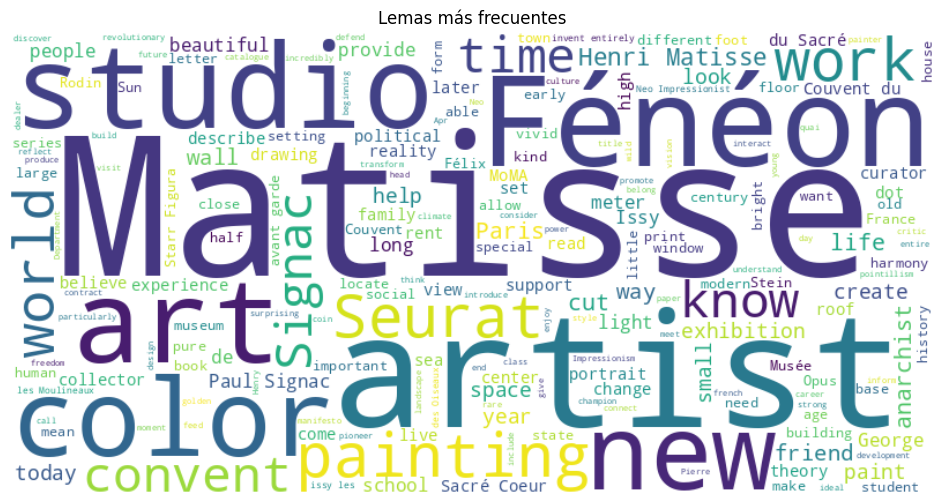

In [ ]:
# Visualización: WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lista de colores
my_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff6f61', '#8e7cc3']

# Función para generar colores aleatorios de tu lista
def color_func(word, **kwargs):
    return random.choice(my_colors)

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(lemmas))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras más frecuentes")
plt.show()


In [ ]:
#  Ejemplo de preprocesamiento NLP sobre un fragmento de texto

# Fragmento de ejemplo
sample_text = """It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."""

# 1. Tokenización
tokens = word_tokenize(sample_text)
print("🔹 Tokens:", tokens)

# 2. Remoción de stopwords
stop_words = set(stopwords.words('english'))
tokens_filtered = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
print("🔹 Tokens sin stopwords:", tokens_filtered)

# 3. Lematización
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in tokens_filtered]
print("🔹 Lematización:", lemmatized)

# 4. POS-tagging
pos_tags = pos_tag(lemmatized)
print("🔹 POS Tags:", pos_tags)


🔹 Tokens: ['It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.']
🔹 Tokens sin stopwords: ['truth', 'universally', 'acknowledged', 'single', 'man', 'possession', 'good', 'fortune', 'must', 'want', 'wife']
🔹 Lematización: ['truth', 'universally', 'acknowledged', 'single', 'man', 'possession', 'good', 'fortune', 'must', 'want', 'wife']
🔹 POS Tags: [('truth', 'NN'), ('universally', 'RB'), ('acknowledged', 'VBD'), ('single', 'JJ'), ('man', 'NN'), ('possession', 'NN'), ('good', 'JJ'), ('fortune', 'NN'), ('must', 'MD'), ('want', 'VB'), ('wife', 'NN')]


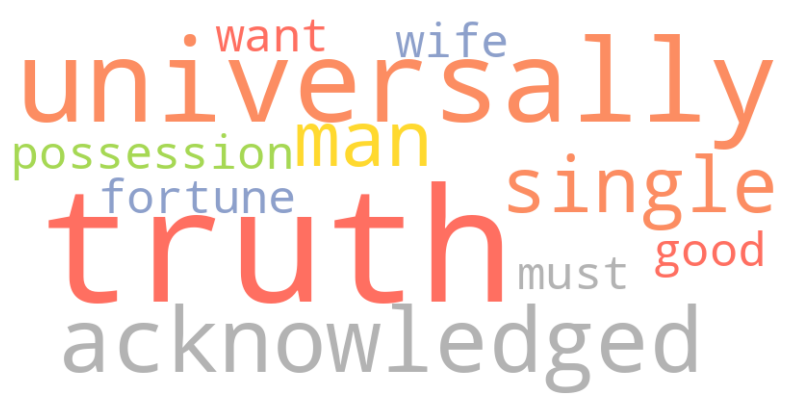

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Convertir tokens filtrados a minúsculas
tokens_lower = [word.lower() for word in tokens_filtered]

# Crear un solo string para WordCloud
text_for_wordcloud = " ".join(tokens_lower)

my_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff6f61', '#8e7cc3']

def color_func(word, **kwargs):
    return random.choice(my_colors)

# Generar y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_for_wordcloud)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from nltk import bigrams, FreqDist

# Crear bigramas
bigrams_list = list(bigrams(tokens_lower))

# Contar los bigramas más frecuentes
fdist_bigrams = FreqDist(bigrams_list)

# Mostrar los 10 bigramas más comunes
print("🔸 Top 10 Bigramas más frecuentes:")
for pair, freq in fdist_bigrams.most_common(10):
    print(f"{pair}: {freq}")


🔸 Top 10 Bigramas más frecuentes:
('truth', 'universally'): 1
('universally', 'acknowledged'): 1
('acknowledged', 'single'): 1
('single', 'man'): 1
('man', 'possession'): 1
('possession', 'good'): 1
('good', 'fortune'): 1
('fortune', 'must'): 1
('must', 'want'): 1
('want', 'wife'): 1


In [ ]:
from textblob import TextBlob

# Crear un TextBlob a partir del texto de ejemplo
blob = TextBlob(sample_text)

# Mostrar polaridad y subjetividad
print("🔹 Análisis de Sentimiento:")
print(f"Polaridad: {blob.sentiment.polarity} (de -1 a 1)")
print(f"Subjetividad: {blob.sentiment.subjectivity} (de 0 a 1)")


🔹 Análisis de Sentimiento:
Polaridad: 0.20952380952380953 (de -1 a 1)
Subjetividad: 0.27142857142857146 (de 0 a 1)


# **Deep Learning**

Análisis exploratorio

In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/Coder /Dataset'

import pandas as pd
import numpy as np


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Coder /Dataset


In [ ]:
df = pd.read_csv('Artworks.csv')
df.head()

<ipython-input-67-1fb56993d529>:1: DtypeWarning: Columns (17,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Artworks.csv')


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,168.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,29.8451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,31.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132403 entries, 0 to 132402
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               132349 non-null  object 
 1   Artist              130947 non-null  object 
 2   ConstituentID       130942 non-null  object 
 3   ArtistBio           127701 non-null  object 
 4   Nationality         130935 non-null  object 
 5   BeginDate           130940 non-null  object 
 6   EndDate             130940 non-null  object 
 7   Gender              130939 non-null  object 
 8   Date                130217 non-null  object 
 9   Medium              121179 non-null  object 
 10  Dimensions          121178 non-null  object 
 11  CreditLine          129462 non-null  object 
 12  AccessionNumber     132394 non-null  object 
 13  Classification      132402 non-null  object 
 14  Department          132402 non-null  object 
 15  DateAcquired        126416 non-nul

In [ ]:
df.drop(columns=['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Weight (kg)', 'Seat Height (cm)', 'ThumbnailURL'])

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,Height (cm),Width (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,48.6,168.9,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,40.6401,29.8451,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,34.3,31.8,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,50.8,50.8,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,38.4,19.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132398,An Episode in the Life of a Landscape Painter ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,Book from a multiple of archival carrying case...,...,656.2017.19,Illustrated Book,Prints & Illustrated Books,2017-10-18,N,274763,NaN,NaN,NaN,NaN
132399,Incense Sweaters & Ice (Installation),Martine Syms,68036,"(American, 1988)",(American),(1988),(0),(),2017,"Video (color, sound)",...,779.2017.1-17,Video,Media and Performance Art,2017-12-11,N,274813,NaN,NaN,NaN,4500.0
132400,Just For You,Ken Friedman,2007,"(American, born 1949)",(American),(1939),(0),(Male),1967,NaN,...,4010.2008.1-19,(not assigned),Prints & Illustrated Books,2008-10-08,N,274897,NaN,0.0,0.0,NaN
132401,Marey and Demeny Chronophotographs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892–1900,"35mm film (black and white, silent)",...,16901,Film,Film,1999-01-25,N,274901,NaN,NaN,NaN,420.0


In [ ]:
df.isnull().sum()
df_clean = df.fillna(0)

df_clean.head()


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,0.0,168.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,0.0,29.8451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,0.0,31.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,0.0,50.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,0.0,19.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Insights del Análisis Exploratorio*
<br>


*Departamento dominante:* El departamento de Drawings and Prints posee la mayor cantidad de obras, muy por encima de los demás. Esto sugiere una especialización o mayor volumen en este tipo de piezas dentro del museo.
<br>
<br>
*Desbalance de género:* Predominan los artistas masculinos en el conjunto de datos. Hay una notoria subrepresentación de artistas femeninas, lo que puede evidenciar una desigualdad histórica en la adquisición o producción artística.
<br>
<br>
*Incremento de adquisiciones en los últimos años:* Se observa una clara tendencia ascendente en la cantidad de obras adquiridas a partir de mediados del siglo XX, con picos en los últimos años registrados. Esto puede deberse a políticas de expansión, digitalización o donaciones recientes.

In [ ]:
df_clean = df.copy()

columns_to_drop = [
    'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
    'Unnamed: 33', 'Unnamed: 34', 'Circumference (cm)', 'Depth (cm)',
    'Diameter (cm)', 'Length (cm)', 'Weight (kg)', 'Seat Height (cm)',
    'ThumbnailURL'
]
df_clean.drop(columns=columns_to_drop, inplace=True, errors='ignore')

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna('Unknown')
    else:
        df_clean[col] = df_clean[col].fillna(0)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 125682 entries, 0 to 132402
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Title            125682 non-null  object        
 1   Artist           125682 non-null  object        
 2   ConstituentID    125682 non-null  object        
 3   ArtistBio        125682 non-null  object        
 4   Nationality      125682 non-null  object        
 5   BeginDate        125682 non-null  object        
 6   EndDate          125682 non-null  object        
 7   Gender           125682 non-null  object        
 8   Date             125682 non-null  object        
 9   Medium           125682 non-null  object        
 10  Dimensions       125682 non-null  object        
 11  CreditLine       125682 non-null  object        
 12  AccessionNumber  125682 non-null  object        
 13  Classification   125682 non-null  object        
 14  Department       125682 n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Seleccionar solo las columnas relevantes y quitar nulos
df_model = df[['Title', 'Classification']].dropna()

# 2. Convertir títulos a minúsculas (opcional)
df_model['Title'] = df_model['Title'].str.lower()

# 3. Codificar las etiquetas
label_encoder = LabelEncoder()
df_model['Label'] = label_encoder.fit_transform(df_model['Classification'])

# 4. Tokenizar los títulos
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_model['Title'])
sequences = tokenizer.texts_to_sequences(df_model['Title'])

# 5. Padding
maxlen = 20
X = pad_sequences(sequences, maxlen=maxlen)
y = df_model['Label'].values

# 6. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir parámetros
vocab_size = 5000
embedding_dim = 64
max_length = 20
num_classes = len(label_encoder.classes_)

# Construcción del modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilación
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

# Evaluación
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2513/2513 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - accuracy: 0.5026 - loss: 1.5743 - val_accuracy: 0.6841 - val_loss: 0.9993
Epoch 2/5
2513/2513 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - accuracy: 0.6937 - loss: 0.9592 - val_accuracy: 0.6999 - val_loss: 0.9442
Epoch 3/5
2513/2513 ━━━━━━━━━━━━━━━━━━━━ 81s 20ms/step - accuracy: 0.7175 - loss: 0.8718 - val_accuracy: 0.7032 - val_loss: 0.9215
Epoch 4/5
2513/2513 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.7310 - loss: 0.8289 - val_accuracy: 0.7070 - val_loss: 0.9234
Epoch 5/5
2513/2513 ━━━━━━━━━━━━━━━━━━━━ 81s 19ms/step - accuracy: 0.7365 - loss: 0.7925 - val_accuracy: 0.7104 - val_loss: 0.9226
786/786 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7179 - loss: 0.8994
Test Accuracy: 0.7134


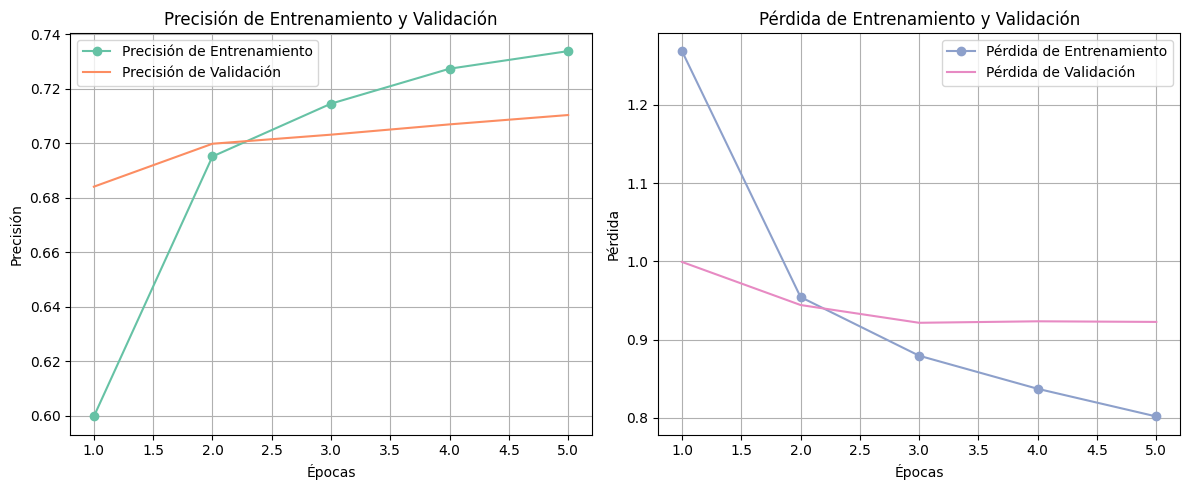

In [ ]:
import matplotlib.pyplot as plt

# Obtener los datos del historial de entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Graficar la precisión de entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
plt.plot(epochs, accuracy, color=my_colors[0], marker='o', label='Precisión de Entrenamiento')
plt.plot(epochs, val_accuracy, color=my_colors[1], label='Precisión de Validación')

plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Graficar la pérdida de entrenamiento y validación
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
plt.plot(epochs, loss, color=my_colors[2], marker='o', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, color=my_colors[3], label='Pérdida de Validación')

plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout

# Dimensiones de los datos
vocab_size = 5000
maxlen = 20
embedding_dim = 100
num_classes = len(label_encoder.classes_)

# Modelo de Deep Learning Mejorado
model_mejorado = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_mejorado.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_mejorado.summary()

# Entrenar el modelo mejorado
print("\nEntrenando Modelo Mejorado...")
history_mejorado = model_mejorado.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluar el modelo mejorado
print("\nEvaluación del Modelo Mejorado:")
loss_mejorado, accuracy_mejorado = model_mejorado.evaluate(X_test, y_test)
print(f"Test Accuracy (Modelo Mejorado): {accuracy_mejorado:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Entrenando Modelo Mejorado...
Epoch 1/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 161s 49ms/step - accuracy: 0.5380 - loss: 1.4387 - val_accuracy: 0.6947 - val_loss: 0.9535
Epoch 2/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 202s 49ms/step - accuracy: 0.7049 - loss: 0.9180 - val_accuracy: 0.7066 - val_loss: 0.9053
Epoch 3/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 199s 48ms/step - accuracy: 0.7226 - loss: 0.8475 - val_accuracy: 0.7097 - val_loss: 0.8946
Epoch 4/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 201s 48ms/step - accuracy: 0.7328 - loss: 0.8110 - val_accuracy: 0.7182 - val_loss: 0.8847
Epoch 5/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 201s 48ms/step - accuracy: 0.7441 - loss: 0.7747 - val_accuracy: 0.7198 - val_loss: 0.8912
Epoch 6/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 202s 48ms/step - accuracy: 0.7515 - loss: 0.7444 - val_accuracy: 0.7213 - val_loss: 0.8957
Epoch 7/10
3141/3141 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.7582 - loss: 0.7198 - val_accuracy: 0.7219 - val_loss: 0.8937
Epoch 8/10
3141/3141 ━━━━━━━━━━━━━━━━━


--- Métricas Detalladas para el Modelo Sencillo ---
786/786 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

Reporte de Clasificación (Modelo Sencillo):
                                precision    recall  f1-score   support

                (not assigned)       0.58      0.36      0.44       125
                  Architecture       0.89      0.88      0.88       594
                         Audio       0.43      0.02      0.04       161
                       Collage       0.00      0.00      0.00         2
                        Design       0.69      0.73      0.71      2201
                       Drawing       0.70      0.39      0.50      2348
                      Ephemera       0.56      0.36      0.43        14
                          Film       0.28      0.07      0.11       439
    Frank Lloyd Wright Archive       0.00      0.00      0.00        12
              Illustrated Book       0.96      0.90      0.93      5157
                  Installation       0.81      0.30      0.44       

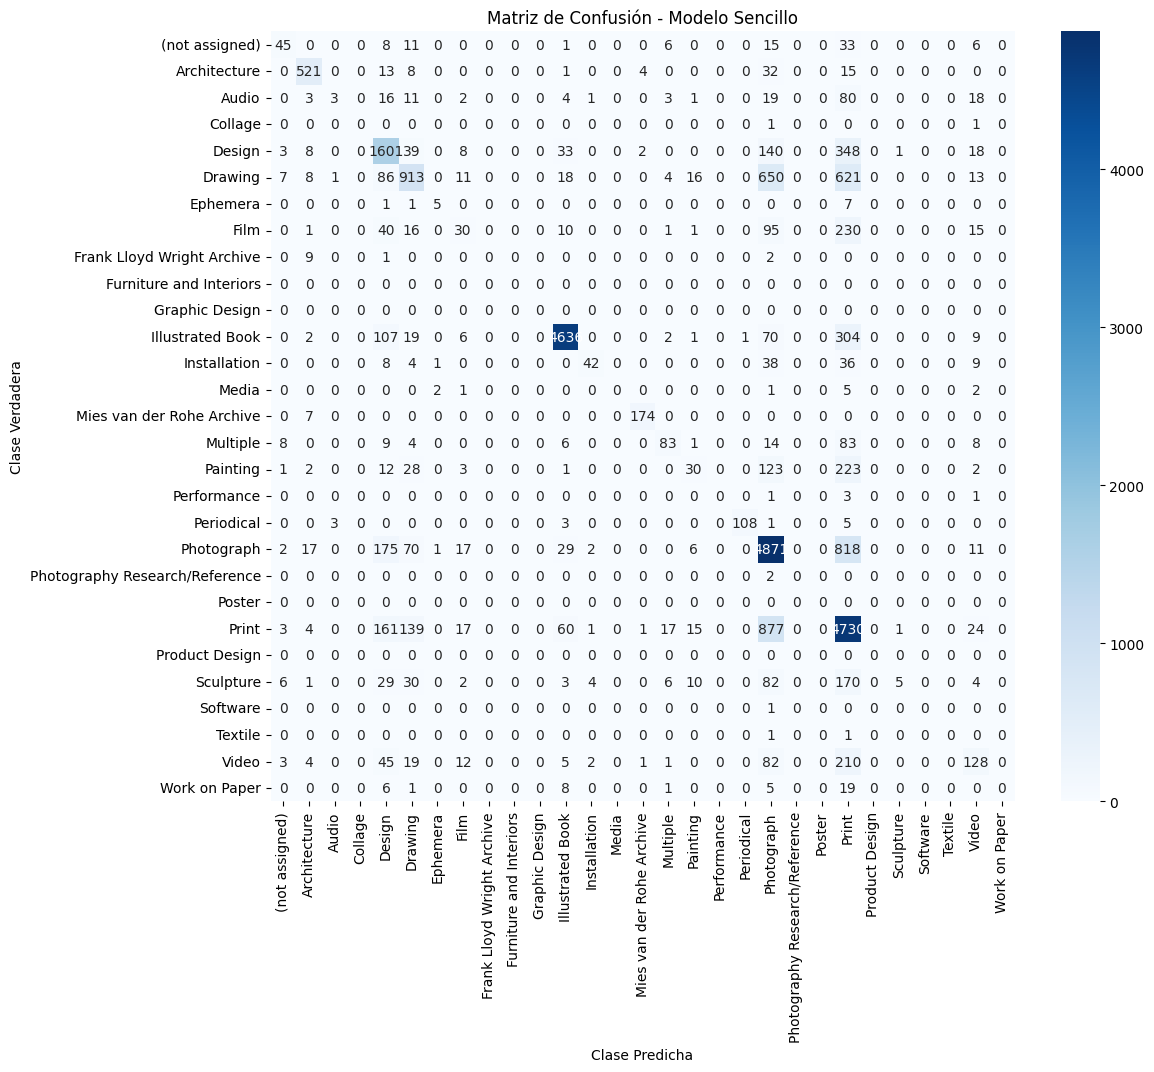


--- Métricas Detalladas para el Modelo Mejorado ---
786/786 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step

Reporte de Clasificación (Modelo Mejorado):
                                precision    recall  f1-score   support

                (not assigned)       0.59      0.44      0.50       125
                  Architecture       0.92      0.89      0.90       594
                         Audio       0.35      0.16      0.22       161
                       Collage       0.00      0.00      0.00         2
                        Design       0.71      0.75      0.73      2201
                       Drawing       0.47      0.59      0.52      2348
                      Ephemera       0.29      0.36      0.32        14
                          Film       0.22      0.15      0.18       439
    Frank Lloyd Wright Archive       1.00      0.08      0.15        12
              Illustrated Book       0.95      0.91      0.93      5157
                  Installation       0.93      0.30      0.45     

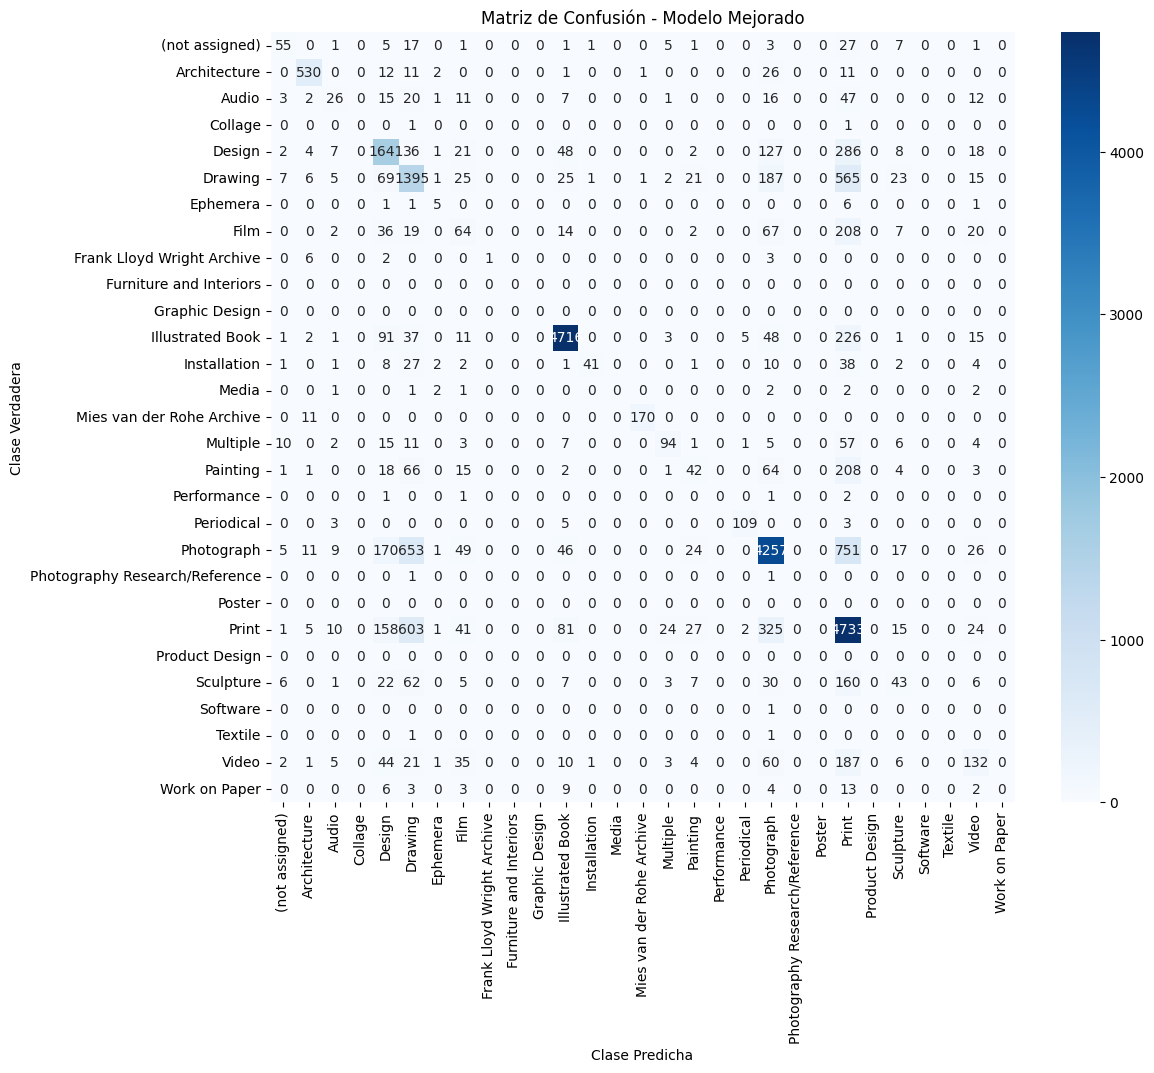

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# --- Para el Modelo Sencillo ---
print("\n--- Métricas Detalladas para el Modelo Sencillo ---")
# Obtener predicciones (probabilidades)
y_pred_proba_sencillo = model.predict(X_test)

# Convertir probabilidades a etiquetas de clase (argmax para one-hot)
y_pred_sencillo = np.argmax(y_pred_proba_sencillo, axis=1)

y_test_original_labels = label_encoder.inverse_transform(y_test)
y_pred_original_labels_sencillo = label_encoder.inverse_transform(y_pred_sencillo)


print("\nReporte de Clasificación (Modelo Sencillo):")
print(classification_report(y_test_original_labels, y_pred_original_labels_sencillo, zero_division=0))

# Matriz de Confusión
cm_sencillo = confusion_matrix(y_test_original_labels, y_pred_original_labels_sencillo, labels=label_encoder.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_sencillo, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Modelo Sencillo')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# --- Para el Modelo Mejorado ---
print("\n--- Métricas Detalladas para el Modelo Mejorado ---")
y_pred_proba_mejorado = model_mejorado.predict(X_test)
y_pred_mejorado = np.argmax(y_pred_proba_mejorado, axis=1)
y_pred_original_labels_mejorado = label_encoder.inverse_transform(y_pred_mejorado)

print("\nReporte de Clasificación (Modelo Mejorado):")
print(classification_report(y_test_original_labels, y_pred_original_labels_mejorado, zero_division=0))

cm_mejorado = confusion_matrix(y_test_original_labels, y_pred_original_labels_mejorado, labels=label_encoder.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_mejorado, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Modelo Mejorado')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()


# Conclusiones
Análisis comparativo del rendimiento de dos modelos de redes neuronales.
<br>

*. Modelo Sencillo (Arquitectura y Rendimiento Base):*
El primer modelo implementado, consistió en una red neuronal secuencial con una capa Embedding para la representación vectorial de las palabras, seguida de una capa LSTM (Long Short-Term Memory) para procesar la secuencia de texto. Se incluyó una capa Dropout para regularización y una capa Dense final con activación softmax para la clasificación multiclase. Este modelo fue entrenado durante 5 épocas.
Tras el entrenamiento, el modelo alcanzó las siguientes métricas de rendimiento en el conjunto de validación (usadas como indicativo del rendimiento en prueba):
Precisión de Validación (val_accuracy): Aproximadamente 70.49%
Pérdida de Validación (val_loss): Aproximadamente 0.9575
Los gráficos de precisión y pérdida de entrenamiento y validación mostraron una clara tendencia de aprendizaje, pero también evidenciaron un overfitting moderado, donde la precisión de entrenamiento era consistentemente superior a la de validación, y la pérdida de entrenamiento disminuía más rápidamente que la de validación.
<br>
<br>
<br>
*. Modelo Mejorado (Arquitectura y Rendimiento):*
Se incorporaron capas adicionales y se ajustaron las existentes. Las principales modificaciones en este modelo, entrenado durante 10 épocas, fueron:
La inclusión de una capa SpatialDropout1D después del Embedding para una regularización más específica de los vectores de palabras.
La sustitución de la capa LSTM por una Bidirectional(LSTM), permitiendo al modelo procesar la secuencia de texto tanto hacia adelante como hacia atrás, lo que a menudo mejora la comprensión del contexto y las dependencias a largo plazo.
La adición de una capa Dense intermedia con activación ReLU y otra capa Dropout para aumentar la capacidad de aprendizaje y añadir más puntos de regularización.
El entrenamiento del modelo mejorado resultó en las siguientes métricas en el conjunto de prueba (validación):
Precisión (Test/Validation Accuracy): 71.85%
Pérdida (Test/Validation Loss): 0.9349" "Adicionalmente, se observó una Precisión de Entrenamiento de 77.37% y una Pérdida de Entrenamiento de 0.6632 en la última época.
<br>
<br>
<br>
*. Comparación de Resultados y Dimensionamiento de Mejoras:*
Diferencias en el rendimiento entre ambos modelos:
En términos de Precisión: El modelo mejorado logró una precisión de validación de 71.85%, lo que representa una ligera mejora de aproximadamente 1.36 puntos porcentuales respecto al modelo sencillo (70.49%).
En términos de Pérdida: La pérdida en el conjunto de prueba para el modelo mejorado fue de 0.9349, que es ligeramente menor que la pérdida de 0.9575 del modelo sencillo, indicando una mejor capacidad de ajuste a los datos no vistos.
Analizando los gráficos de entrenamiento y validación de ambos modelos, se puede apreciar que la brecha entre la precisión de entrenamiento y validación, indicativa de overfitting, se mantiene en el modelo mejorado, e incluso la precisión de entrenamiento es significativamente más alta (77.37% vs 71.85% de validación) al final del entrenamiento. Esto sugiere que, si bien las capas adicionales y la Bidirectional LSTM aumentaron la capacidad del modelo para aprender y capturar patrones más complejos en los datos de entrenamiento, también aumentaron su tendencia al sobreajuste, o que las 10 épocas fueron demasiadas para la validación.
Esta comparación demuestra que las modificaciones arquitectónicas, particularmente la introducción de la capa Bidirectional LSTM y las capas Dense adicionales, resultaron en una mejora modesta pero tangible en la capacidad de generalización del modelo, al incrementar la precisión en el conjunto de prueba. No obstante, el desafío del sobreajuste persiste, y la complejidad adicional del modelo requeriría una mayor atención a técnicas de regularización o la optimización de hiperparámetros para explotar completamente su potencial.